<a href="https://colab.research.google.com/github/Srijani-coder/Data_Science_Learning_Portfolio/blob/main/BigData_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pandas pyarrow


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


***Task 1***

In [9]:
# URLs to the Parquet files
url_january = "/content/sample_data/yellow_tripdata_2023-01.parquet"
url_march = "/content/sample_data/yellow_tripdata_2023-03 .parquet"
url_june = "/content/sample_data/yellow_tripdata_2023-06 .parquet"

# Load the data into Pandas data frames
df_january = pd.read_parquet(url_january)
df_march = pd.read_parquet(url_march)
df_june = pd.read_parquet(url_june)

In [10]:
df_january.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [11]:
df_march.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-01 00:06:43   2023-03-01 00:16:43              1.0   
1         2  2023-03-01 00:08:25   2023-03-01 00:39:30              2.0   
2         1  2023-03-01 00:15:04   2023-03-01 00:29:26              0.0   
3         1  2023-03-01 00:49:37   2023-03-01 01:01:05              1.0   
4         2  2023-03-01 00:08:04   2023-03-01 00:11:06              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.00         1.0                  N           238            42   
1          12.40         1.0                  N           138           231   
2           3.30         1.0                  N           140           186   
3           2.90         1.0                  N           140            43   
4           1.23         1.0                  N            79           137   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          8.6    1.0      0.5        0.00           0.0   
1             1         52.7    6.0      0.5       12.54           0.0   
2             1         18.4    3.5      0.5        4.65           0.0   
3             1         15.6    3.5      0.5        4.10           0.0   
4             1          7.2    1.0      0.5        2.44           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         11.10                   0.0         0.00  
1                    1.0         76.49                   2.5         1.25  
2                    1.0         28.05                   2.5         0.00  
3                    1.0         24.70                   2.5         0.00  
4                    1.0         14.64                   2.5         0.00

In [12]:
df_june.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-01 00:08:48   2023-06-01 00:29:41              1.0   
1         1  2023-06-01 00:15:04   2023-06-01 00:25:18              0.0   
2         1  2023-06-01 00:48:24   2023-06-01 01:07:07              1.0   
3         2  2023-06-01 00:54:03   2023-06-01 01:17:29              3.0   
4         2  2023-06-01 00:18:44   2023-06-01 00:27:18              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.40         1.0                  N           140           238   
1           3.40         1.0                  N            50           151   
2          10.20         1.0                  N           138            97   
3           9.83         1.0                  N           100           244   
4           1.17         1.0                  N           137           234   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         21.9   3.50      0.5        6.70           0.0   
1             1         15.6   3.50      0.5        3.00           0.0   
2             1         40.8   7.75      0.5       10.00           0.0   
3             1         39.4   1.00      0.5        8.88           0.0   
4             1          9.3   1.00      0.5        0.72           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         33.60                   2.5         0.00  
1                    1.0         23.60                   2.5         0.00  
2                    1.0         60.05                   0.0         1.75  
3                    1.0         53.28                   2.5         0.00  
4                    1.0         15.02                   2.5         0.00

In [13]:
print(str("2023-01-01 00:37:49").split("-"))

['2023', '01', '01 00:37:49']


In [14]:
from datetime import datetime

def extract_month_from_datetime(input_str):
    datetime_str = str(input_str)
    # Parse the datetime string to a datetime object
    datetime_list = datetime_str.split('-')
    # Extract the month as an integer
    year = int(datetime_list[0])
    month = str(datetime_list[1])
    day_time = str(datetime_list[2]).split(' ')
    day = int(str(day_time[0]))
    time = str(day_time[1]).split(':')
    hour = int(time[0])
    minute = int(time[1])
    second = int(time[2])
    # Convert it to an integer and trim leading zeros
    month = month.replace('0','')
    return int(month)



In [15]:
df_january['month'] = df_january['tpep_pickup_datetime'].apply(extract_month_from_datetime)

In [16]:
# Get distinct values in the 'month' column
distinct_m = df_january['month'].unique()

# Print the distinct months
print("Distinct months in the 'month' column:")
for month in distinct_m:
    print(month)


Distinct months in the 'month' column:
1
12
2


In [17]:
df_march['month'] = df_march['tpep_pickup_datetime'].apply(extract_month_from_datetime)

In [18]:
# Get distinct values in the 'month' column
distinct_m3 = df_march['month'].unique()

# Print the distinct months
print("Distinct months in the 'month' column:")
for month in distinct_m3:
    print(month)

Distinct months in the 'month' column:
3
2
12
1
11
4


In [19]:
df_june['month'] = df_june['tpep_pickup_datetime'].apply(extract_month_from_datetime)

In [20]:
# Get distinct values in the 'month' column
distinct_m4 = df_june['month'].unique()

# Print the distinct months
print("Distinct months in the 'month' column:")
for month in distinct_m4:
    print(month)

Distinct months in the 'month' column:
6
5
12
1
7


In [21]:
df_jan = df_january[df_january['month'] == 1]

In [22]:
df_jan.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'month'],
      dtype='object')

In [23]:
df_m = df_march[df_march['month'] == 3]

In [24]:
df_m.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'month'],
      dtype='object')

In [25]:
df_j = df_june[df_june['month'] == 6]

In [26]:
df_j.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'month'],
      dtype='object')

In [27]:
# Rename the column
df_jan.rename(columns={'airport_fee': 'Airport_fee'}, inplace=True)


<ipython-input-27-1623628e529f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan.rename(columns={'airport_fee': 'Airport_fee'}, inplace=True)


In [28]:
df_jan.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

   month  
0      1  
1      1  
2      1  
3      1  
4      1

In [29]:
df_j_jan = df_june[df_june['month'] == 1]

In [30]:
df_m_jan = df_march[df_march['month'] == 1]

In [31]:
# Create a list of dataframes for each month
dfs_jan = [df_jan, df_m_jan, df_j_jan]

# Concatenate the dataframes vertically to create one unified dataframe
dfjan_combined = pd.concat(dfs_jan)

In [32]:
# Create a list of dataframes for each month
dfs_combo = [dfjan_combined, df_m, df_j]

# Concatenate the dataframes vertically to create one unified dataframe
dfn_combined = pd.concat(dfs_combo)

In [33]:
distinct_months = dfjan_combined['month'].nunique()

print("Number of distinct months:", distinct_months)

Number of distinct months: 1


In [34]:
distinct_months = dfn_combined['month'].nunique()

print("Number of distinct months:", distinct_months)

Number of distinct months: 3


In [35]:
# Basic statistics for each month
summary_stats = dfn_combined.groupby(dfn_combined["month"]).agg({
    "trip_distance": "mean",
    "fare_amount": "mean",
    "passenger_count": "mean"
}).reset_index()

# Print the summary statistics
print(summary_stats)


   month  trip_distance  fare_amount  passenger_count
0      1       3.847356    18.367133         1.362534
1      3       3.903957    18.908542         1.351418
2      6       4.368765    19.987933         1.369012


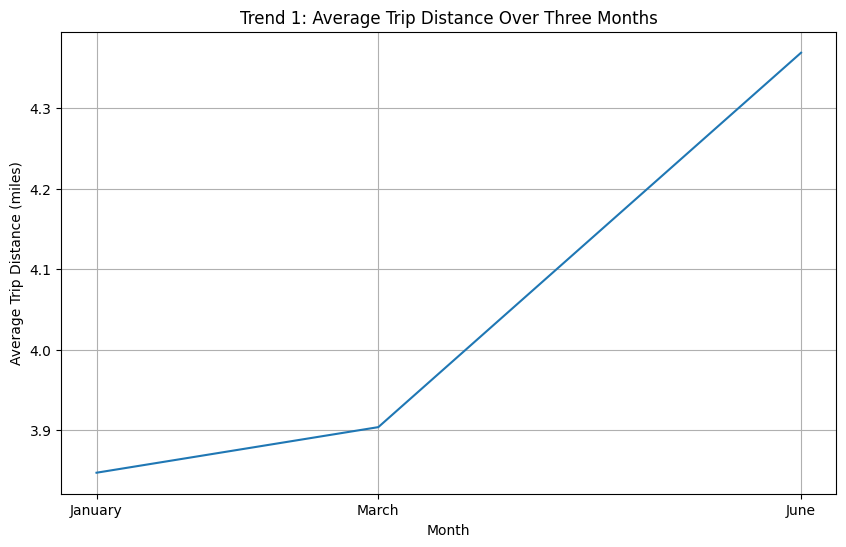

In [36]:
# Plotting trend 1: Average trip distance over the three months
plt.figure(figsize=(10, 6))
sns.lineplot(x="month", y="trip_distance", data=summary_stats)
plt.xlabel("Month")
plt.ylabel("Average Trip Distance (miles)")
plt.title("Trend 1: Average Trip Distance Over Three Months")
plt.xticks([1, 3, 6], ["January", "March", "June"])
plt.grid()
plt.show()


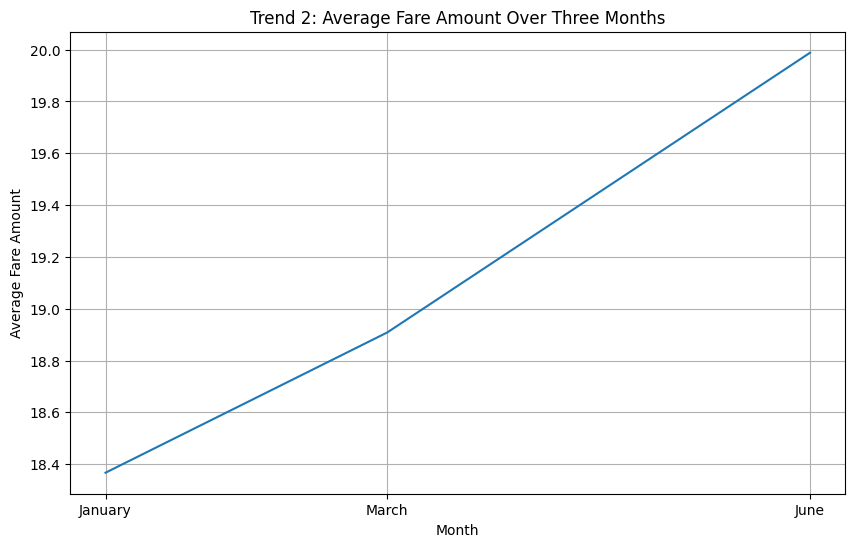

In [37]:
# Plotting trend 2: Average fare amount over the three months
plt.figure(figsize=(10, 6))
sns.lineplot(x="month", y="fare_amount", data=summary_stats)
plt.xlabel("Month")
plt.ylabel("Average Fare Amount")
plt.title("Trend 2: Average Fare Amount Over Three Months")
plt.xticks([1, 3, 6], ["January", "March", "June"])
plt.grid()
plt.show()

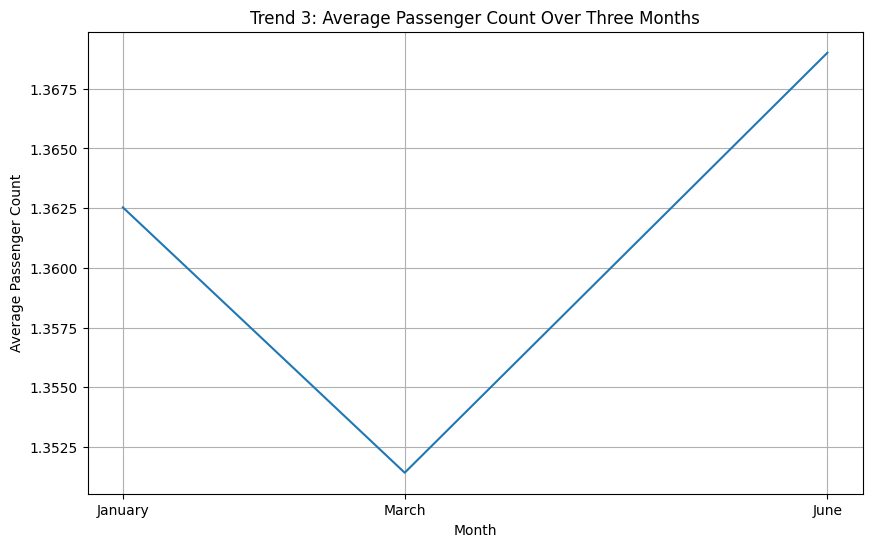

In [38]:
# Plotting trend 3: Average passenger count over the three months
plt.figure(figsize=(10, 6))
sns.lineplot(x="month", y="passenger_count", data=summary_stats)
plt.xlabel("Month")
plt.ylabel("Average Passenger Count")
plt.title("Trend 3: Average Passenger Count Over Three Months")
plt.xticks([1, 3, 6], ["January", "March", "June"])
plt.grid()
plt.show()


In [39]:
# Calculate basic statistics for the selected columns
stats = dfn_combined[['trip_distance', 'fare_amount', 'passenger_count']].describe()

# Calculate the correlation matrix for the selected columns
correlation_matrix = dfn_combined[['trip_distance', 'fare_amount', 'passenger_count']].corr()
print(correlation_matrix)


                 trip_distance  fare_amount  passenger_count
trip_distance         1.000000     0.002825         0.003531
fare_amount           0.002825     1.000000         0.005868
passenger_count       0.003531     0.005868         1.000000


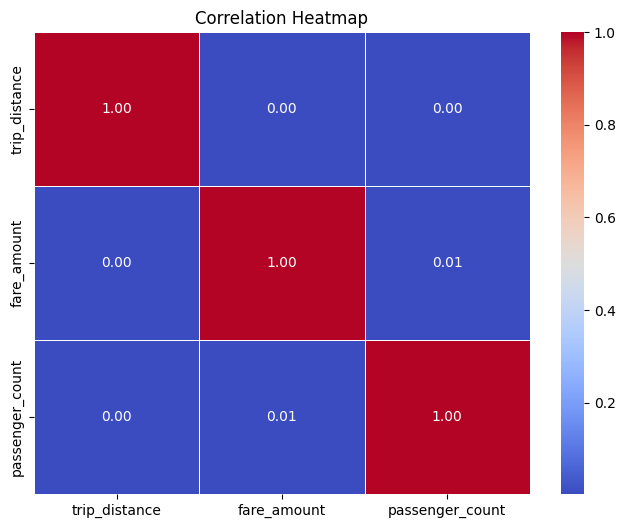

In [40]:
# 4. Heatmap for Correlation
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [41]:
# 5. Display the statistics and correlation matrix
print("Descriptive Statistics:")
print(stats)


Descriptive Statistics:
       trip_distance   fare_amount  passenger_count
count   9.777506e+06  9.777506e+06     9.518257e+06
mean    4.043423e+00  1.910383e+01     1.360844e+00
std     2.234262e+02  1.251338e+02     8.926501e-01
min     0.000000e+00 -9.599000e+02     0.000000e+00
25%     1.070000e+00  9.300000e+00     1.000000e+00
50%     1.800000e+00  1.350000e+01     1.000000e+00
75%     3.400000e+00  2.120000e+01     1.000000e+00
max     2.589281e+05  3.869836e+05     9.000000e+00


***Task 2***

In [42]:
jan_data = dfjan_combined



*   Task 2.1



In [43]:
# Task 1: Check for missing values and show columns with missing values
missing_values = jan_data.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]

if not columns_with_missing.empty:
    print("Columns with missing values:")
    print(columns_with_missing)
else:
    print("No missing values in the dataset.")


Columns with missing values:
passenger_count         71743
RatecodeID              71743
store_and_fwd_flag      71743
congestion_surcharge    71743
Airport_fee             71743
dtype: int64


In [44]:
distinct_flag = jan_data['store_and_fwd_flag'].unique()
for flag in distinct_flag:
  print(flag)

N
Y
None


In [45]:
distinct_ratecodeID = jan_data['RatecodeID'].unique()
for id in distinct_ratecodeID:
  print(id)

1.0
2.0
4.0
99.0
5.0
3.0
6.0
nan


In [46]:
distinct_pscount = jan_data['passenger_count'].unique()
for cnt in distinct_pscount:
  print(cnt)

1.0
0.0
4.0
2.0
3.0
5.0
6.0
8.0
7.0
9.0
nan


In [47]:
length = jan_data.shape[0]
print("Length of DataFrame:", length)

Length of DataFrame: 3066736


In [48]:
#Column Name: passenger_count
#Column Name: RatecodeID
#Column Name: store_and_fwd_flag
#Column Name: congestion_surcharge
#Column Name: Airport_fee

In [49]:
row_indices_with_pscount = jan_data[jan_data['passenger_count'].isnull()].index.tolist()
print(row_indices_with_pscount)

[2995023, 2995024, 2995025, 2995026, 2995027, 2995028, 2995029, 2995030, 2995031, 2995032, 2995033, 2995034, 2995035, 2995036, 2995037, 2995038, 2995039, 2995040, 2995041, 2995042, 2995043, 2995044, 2995045, 2995046, 2995047, 2995048, 2995049, 2995050, 2995051, 2995052, 2995053, 2995054, 2995055, 2995056, 2995057, 2995058, 2995059, 2995060, 2995061, 2995062, 2995063, 2995064, 2995065, 2995066, 2995067, 2995068, 2995069, 2995070, 2995071, 2995072, 2995073, 2995074, 2995075, 2995076, 2995077, 2995078, 2995079, 2995080, 2995081, 2995082, 2995083, 2995084, 2995085, 2995086, 2995087, 2995088, 2995089, 2995090, 2995091, 2995092, 2995093, 2995094, 2995095, 2995096, 2995097, 2995098, 2995099, 2995100, 2995101, 2995102, 2995103, 2995104, 2995105, 2995106, 2995107, 2995108, 2995109, 2995110, 2995111, 2995112, 2995113, 2995114, 2995115, 2995116, 2995117, 2995118, 2995119, 2995120, 2995121, 2995122, 2995123, 2995124, 2995125, 2995126, 2995127, 2995128, 2995129, 2995130, 2995131, 2995132, 2995133, 

In [50]:
row_indices_with_ratecodeid = jan_data[jan_data['RatecodeID'].isnull()].index.tolist()
print(row_indices_with_ratecodeid)

[2995023, 2995024, 2995025, 2995026, 2995027, 2995028, 2995029, 2995030, 2995031, 2995032, 2995033, 2995034, 2995035, 2995036, 2995037, 2995038, 2995039, 2995040, 2995041, 2995042, 2995043, 2995044, 2995045, 2995046, 2995047, 2995048, 2995049, 2995050, 2995051, 2995052, 2995053, 2995054, 2995055, 2995056, 2995057, 2995058, 2995059, 2995060, 2995061, 2995062, 2995063, 2995064, 2995065, 2995066, 2995067, 2995068, 2995069, 2995070, 2995071, 2995072, 2995073, 2995074, 2995075, 2995076, 2995077, 2995078, 2995079, 2995080, 2995081, 2995082, 2995083, 2995084, 2995085, 2995086, 2995087, 2995088, 2995089, 2995090, 2995091, 2995092, 2995093, 2995094, 2995095, 2995096, 2995097, 2995098, 2995099, 2995100, 2995101, 2995102, 2995103, 2995104, 2995105, 2995106, 2995107, 2995108, 2995109, 2995110, 2995111, 2995112, 2995113, 2995114, 2995115, 2995116, 2995117, 2995118, 2995119, 2995120, 2995121, 2995122, 2995123, 2995124, 2995125, 2995126, 2995127, 2995128, 2995129, 2995130, 2995131, 2995132, 2995133, 

In [51]:
row_indices_with_flagcount = jan_data[jan_data['store_and_fwd_flag'].isnull()].index.tolist()
print(row_indices_with_flagcount)

[2995023, 2995024, 2995025, 2995026, 2995027, 2995028, 2995029, 2995030, 2995031, 2995032, 2995033, 2995034, 2995035, 2995036, 2995037, 2995038, 2995039, 2995040, 2995041, 2995042, 2995043, 2995044, 2995045, 2995046, 2995047, 2995048, 2995049, 2995050, 2995051, 2995052, 2995053, 2995054, 2995055, 2995056, 2995057, 2995058, 2995059, 2995060, 2995061, 2995062, 2995063, 2995064, 2995065, 2995066, 2995067, 2995068, 2995069, 2995070, 2995071, 2995072, 2995073, 2995074, 2995075, 2995076, 2995077, 2995078, 2995079, 2995080, 2995081, 2995082, 2995083, 2995084, 2995085, 2995086, 2995087, 2995088, 2995089, 2995090, 2995091, 2995092, 2995093, 2995094, 2995095, 2995096, 2995097, 2995098, 2995099, 2995100, 2995101, 2995102, 2995103, 2995104, 2995105, 2995106, 2995107, 2995108, 2995109, 2995110, 2995111, 2995112, 2995113, 2995114, 2995115, 2995116, 2995117, 2995118, 2995119, 2995120, 2995121, 2995122, 2995123, 2995124, 2995125, 2995126, 2995127, 2995128, 2995129, 2995130, 2995131, 2995132, 2995133, 

In [52]:
row_indices_with_cscharge = jan_data[jan_data['congestion_surcharge'].isnull()].index.tolist()
print(row_indices_with_cscharge)

[2995023, 2995024, 2995025, 2995026, 2995027, 2995028, 2995029, 2995030, 2995031, 2995032, 2995033, 2995034, 2995035, 2995036, 2995037, 2995038, 2995039, 2995040, 2995041, 2995042, 2995043, 2995044, 2995045, 2995046, 2995047, 2995048, 2995049, 2995050, 2995051, 2995052, 2995053, 2995054, 2995055, 2995056, 2995057, 2995058, 2995059, 2995060, 2995061, 2995062, 2995063, 2995064, 2995065, 2995066, 2995067, 2995068, 2995069, 2995070, 2995071, 2995072, 2995073, 2995074, 2995075, 2995076, 2995077, 2995078, 2995079, 2995080, 2995081, 2995082, 2995083, 2995084, 2995085, 2995086, 2995087, 2995088, 2995089, 2995090, 2995091, 2995092, 2995093, 2995094, 2995095, 2995096, 2995097, 2995098, 2995099, 2995100, 2995101, 2995102, 2995103, 2995104, 2995105, 2995106, 2995107, 2995108, 2995109, 2995110, 2995111, 2995112, 2995113, 2995114, 2995115, 2995116, 2995117, 2995118, 2995119, 2995120, 2995121, 2995122, 2995123, 2995124, 2995125, 2995126, 2995127, 2995128, 2995129, 2995130, 2995131, 2995132, 2995133, 

In [53]:
row_indices_with_afee = jan_data[jan_data['Airport_fee'].isnull()].index.tolist()
print(row_indices_with_afee)

[2995023, 2995024, 2995025, 2995026, 2995027, 2995028, 2995029, 2995030, 2995031, 2995032, 2995033, 2995034, 2995035, 2995036, 2995037, 2995038, 2995039, 2995040, 2995041, 2995042, 2995043, 2995044, 2995045, 2995046, 2995047, 2995048, 2995049, 2995050, 2995051, 2995052, 2995053, 2995054, 2995055, 2995056, 2995057, 2995058, 2995059, 2995060, 2995061, 2995062, 2995063, 2995064, 2995065, 2995066, 2995067, 2995068, 2995069, 2995070, 2995071, 2995072, 2995073, 2995074, 2995075, 2995076, 2995077, 2995078, 2995079, 2995080, 2995081, 2995082, 2995083, 2995084, 2995085, 2995086, 2995087, 2995088, 2995089, 2995090, 2995091, 2995092, 2995093, 2995094, 2995095, 2995096, 2995097, 2995098, 2995099, 2995100, 2995101, 2995102, 2995103, 2995104, 2995105, 2995106, 2995107, 2995108, 2995109, 2995110, 2995111, 2995112, 2995113, 2995114, 2995115, 2995116, 2995117, 2995118, 2995119, 2995120, 2995121, 2995122, 2995123, 2995124, 2995125, 2995126, 2995127, 2995128, 2995129, 2995130, 2995131, 2995132, 2995133, 

In [54]:
def make_list_diff(list1,list2):
  diff = []
  for i in list1:
    if i not in list2:
      diff.append(i)

  x = len(list1) - len(list2)
  print(x)

  return diff

In [55]:
diff1 = make_list_diff(row_indices_with_cscharge,row_indices_with_pscount)
print(diff1)
diff2 = make_list_diff(row_indices_with_cscharge,row_indices_with_afee)
print(diff2)
diff3 = make_list_diff(row_indices_with_cscharge,row_indices_with_flagcount)
print(diff3)
diff4 = make_list_diff(row_indices_with_cscharge,row_indices_with_ratecodeid)
print(diff4)




0
[]
0
[]
0
[]
0
[]


In [56]:
jan_data.dropna(subset=['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'Airport_fee'], inplace=True)
print(len(jan_data))

2994993


In [57]:
jan_data.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

   month  
0      1  
1      1  
2      1  
3      1  
4      1

Task 2.2

In [58]:
# Search for negative values in numeric column
vend_neg = jan_data[jan_data['VendorID'] < 0].index.tolist()
print(vend_neg)
pscount_neg = jan_data[jan_data['passenger_count'] < 0].index.tolist()
print(pscount_neg)
tripdist_neg = jan_data[jan_data['trip_distance'] < 0].index.tolist()
print(tripdist_neg)
ratecode_neg = jan_data[jan_data['RatecodeID'] < 0].index.tolist()
print(ratecode_neg)
pulocation_neg = jan_data[jan_data['PULocationID'] < 0].index.tolist()
print(pulocation_neg)
dolocation_neg = jan_data[jan_data['DOLocationID'] < 0].index.tolist()
print(dolocation_neg)
paymentype_neg = jan_data[jan_data['payment_type'] < 0].index.tolist()
print(paymentype_neg)
fareamt_neg = jan_data[jan_data['fare_amount'] < 0.0].index.tolist()
print(fareamt_neg)
extra_neg = jan_data[jan_data['extra'] < 0.0].index.tolist()
print(extra_neg)
mtax_neg = jan_data[jan_data['mta_tax'] < 0.0].index.tolist()
print(mtax_neg)
tip_neg = jan_data[jan_data['tip_amount'] < 0.0].index.tolist()
print(tip_neg)
toll_neg = jan_data[jan_data['tolls_amount'] < 0.0].index.tolist()
print(toll_neg)
impvs_neg = jan_data[jan_data['improvement_surcharge'] < 0.0].index.tolist()
print(impvs_neg)
tamt_neg = jan_data[jan_data['total_amount'] < 0.0].index.tolist()
print(tamt_neg)
cgscharge_neg = jan_data[jan_data['congestion_surcharge'] < 0.0].index.tolist()
print(cgscharge_neg)
afee_neg = jan_data[jan_data['Airport_fee'] < 0.0].index.tolist()
print(afee_neg)

[]
[]
[]
[]
[]
[]
[]
[132, 263, 324, 620, 923, 950, 1303, 1352, 1391, 1728, 1780, 1848, 1929, 2351, 2369, 2461, 2580, 2720, 2884, 2904, 2913, 2915, 3374, 3601, 3622, 3713, 3730, 3933, 3939, 4003, 4039, 4042, 4155, 4282, 4353, 4371, 4384, 4451, 4605, 4609, 4696, 4959, 5133, 5431, 6084, 6201, 6239, 6314, 6424, 6700, 6892, 6928, 7026, 7240, 7309, 7468, 7679, 7929, 8001, 8186, 8255, 8303, 8307, 8500, 8514, 8666, 8799, 9182, 9284, 9308, 9386, 9392, 9394, 9437, 9533, 9538, 9544, 9665, 9780, 9795, 9960, 9963, 10011, 10015, 10323, 10327, 10480, 10731, 10755, 10822, 10899, 10935, 11329, 11395, 11435, 11453, 11514, 11747, 11842, 11857, 11865, 11905, 11917, 11937, 12124, 12385, 12387, 12623, 12913, 13102, 13182, 13245, 13312, 13968, 13992, 13999, 14093, 14095, 14226, 14332, 14340, 14546, 14548, 14550, 14724, 14851, 14887, 14897, 14901, 15073, 15145, 15152, 15187, 15287, 15561, 15570, 15591, 15609, 15642, 15963, 16001, 16043, 16052, 16072, 16201, 16280, 16538, 16545, 16683, 16816, 16851, 16853, 16

In [59]:
len(fareamt_neg)

24995

In [60]:
len(extra_neg)

12407

In [61]:
len(mtax_neg)

24498

In [62]:
len(tip_neg)

222

In [63]:
len(toll_neg)

1377

In [64]:
len(impvs_neg)

25153

In [65]:
len(tamt_neg)

25157

In [66]:
len(cgscharge_neg)

19718

In [67]:
len(afee_neg)

3607

In [68]:
column_list = jan_data.columns.tolist()
print(column_list)

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'month']


In [69]:
numerical_columns = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

In [70]:
categorical_columns = ['store_and_fwd_flag','payment_type']

In [71]:
# Apply column transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),  # Pass-through numerical columns

    ],
    remainder='drop'  # Drop other columns that are not specified
)

# Fit and transform the data using the preprocessor
processed_data = preprocessor.fit_transform(jan_data)

In [72]:
# Get feature names from the one-hot encoder
feature_names = numerical_columns
# Create a DataFrame with the processed data
processed_df = pd.DataFrame(processed_data, columns=feature_names)

In [73]:
new_rest = []
for item in numerical_columns:
  column_list.remove(item)

new_rest = column_list

In [74]:
jan_data.shape

(2994993, 20)

In [75]:
processed_df.shape

(2994993, 16)

In [76]:
rest_df = jan_data[new_rest]

In [77]:
rest_df.shape

(2994993, 4)

In [78]:
processed_df = processed_df.reset_index(drop = True)

In [79]:
rest_df = rest_df.reset_index(drop = True)

In [80]:
final_df = pd.concat([processed_df,rest_df],axis = 1)

In [81]:
final_df.reset_index(drop = True)

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0             2.0              1.0           0.97         1.0         161.0   
1             2.0              1.0           1.10         1.0          43.0   
2             2.0              1.0           2.51         1.0          48.0   
3             1.0              0.0           1.90         1.0         138.0   
4             2.0              1.0           1.43         1.0         107.0   
...           ...              ...            ...         ...           ...   
2994988       2.0              2.0           9.13         1.0         246.0   
2994989       2.0              1.0           3.45         1.0         132.0   
2994990       2.0              1.0          17.68         2.0         132.0   
2994991       2.0              1.0          31.43         4.0         132.0   
2994992       2.0              1.0           2.81         1.0          79.0   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0               141.0           2.0          9.3   1.00      0.5        0.00   
1               237.0           1.0          7.9   1.00      0.5        4.00   
2               238.0           1.0         14.9   1.00      0.5       15.00   
3                 7.0           1.0         12.1   7.25      0.5        0.00   
4                79.0           1.0         11.4   1.00      0.5        3.28   
...               ...           ...          ...    ...      ...         ...   
2994988         243.0           1.0         38.0   1.00      0.5        0.00   
2994989         264.0           2.0         14.9   1.00      0.5        0.00   
2994990          68.0           2.0         70.0   0.00      0.5        0.00   
2994991         265.0           2.0        159.8   0.00      0.5        0.00   
2994992         264.0           1.0         16.3   0.00      0.5        5.08   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    1.0         14.30   
1                0.00                    1.0         16.90   
2                0.00                    1.0         34.90   
3                0.00                    1.0         20.85   
4                0.00                    1.0         19.68   
...               ...                    ...           ...   
2994988          0.00                    1.0         43.00   
2994989          0.00                    1.0         18.65   
2994990          6.55                    1.0         81.80   
2994991          6.55                    1.0        169.10   
2994992          0.00                    1.0         25.38   

         congestion_surcharge  Airport_fee tpep_pickup_datetime  \
0                         2.5         0.00  2023-01-01 00:32:10   
1                         2.5         0.00  2023-01-01 00:55:08   
2                         2.5         0.00  2023-01-01 00:25:04   
3                         0.0         1.25  2023-01-01 00:03:48   
4                         2.5         0.00  2023-01-01 00:10:29   
...                       ...          ...                  ...   
2994988                   2.5         0.00  2001-01-01 15:18:51   
2994989                   0.0         1.25  2003-01-01 00:06:44   
2994990                   2.5         1.25  2001-01-01 00:08:42   
2994991                   0.0         1.25  2003-01-01 00:07:18   
2994992                   2.5         0.00  2003-01-01 00:03:31   

        tpep_dropoff_datetime store_and_fwd_flag  month  
0         2023-01-01 00:40:36                  N      1  
1         2023-01-01 01:01:27                  N      1  
2         2023-01-01 00:37:49                  N      1  
3         2023-01-01 00:13:25                  N      1  
4         2023-01-01 00:21:19                  N      1  
...                       ...                ...    ...  
2994988   2001-01-01 22:08:40                  N      1  
2994989   2003-01-01 23:19:43                  N      1  
2994990   2001-01-01 14:13:

Task 2.3

In [82]:
# numerical columns
numerical_columns = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
# Encode categorical data if necessary
categorical_columns = ['store_and_fwd_flag']

# Use LabelEncoder to convert categorical data to numeric
encoder = LabelEncoder()

# Create a preprocessing pipeline for encoding categorical data
categorical_transformer = Pipeline(steps=[
    ('label', encoder)
])

# Extract features from the datetime column
final_df['tpep_pickup_datetime'] = pd.to_datetime(final_df['tpep_pickup_datetime'])
final_df['pickup_year'] = final_df['tpep_pickup_datetime'].dt.year
final_df['pickup_month'] = final_df['tpep_pickup_datetime'].dt.month
final_df['pickup_hour'] = final_df['tpep_pickup_datetime'].dt.hour

# Extract features from the datetime column
final_df['tpep_dropoff_datetime'] = pd.to_datetime(final_df['tpep_dropoff_datetime'])
final_df['dropoff_year'] = final_df['tpep_dropoff_datetime'].dt.year
final_df['dropoff_month'] = final_df['tpep_dropoff_datetime'].dt.month
final_df['dropoff_hour'] = final_df['tpep_dropoff_datetime'].dt.hour

# Define numerical columns, including the extracted datetime features
numerical_columns += ['pickup_year', 'pickup_month', 'pickup_hour','dropoff_year', 'dropoff_month', 'dropoff_hour']

# Include the datetime column
columns_to_include = numerical_columns + categorical_columns

# Apply column transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),  # Pass-through numerical columns
        ('cat', categorical_transformer, categorical_columns)  # Encode categorical columns
    ],
    remainder='passthrough'  # Include all remaining columns
)




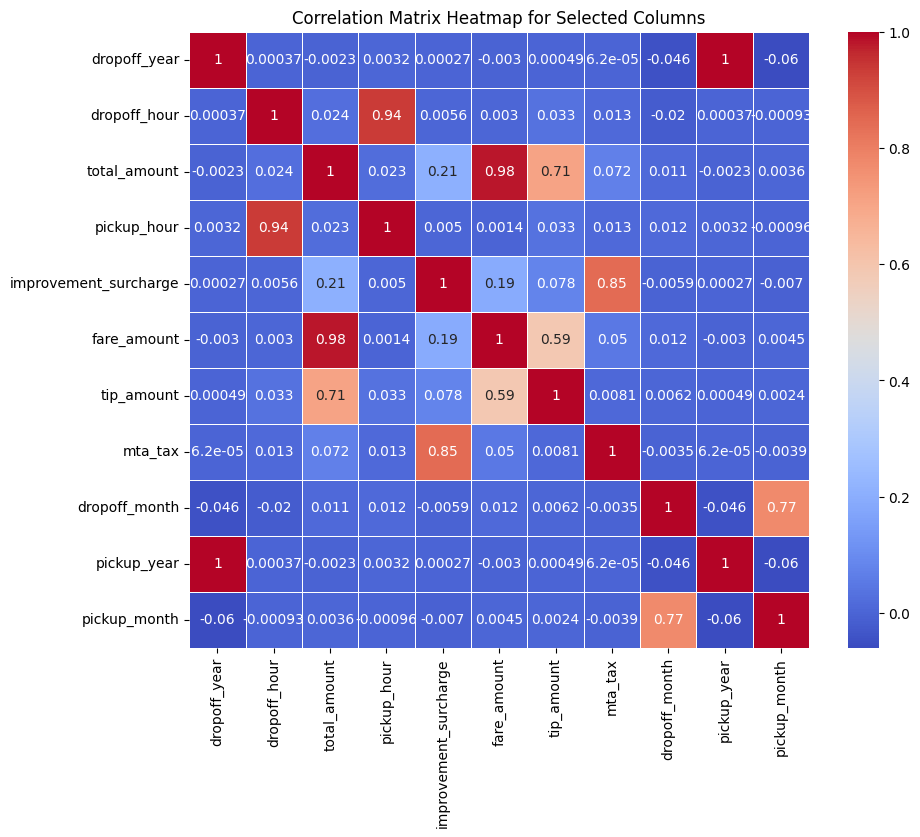

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix for numerical columns
correlation_matrix = final_df[numerical_columns].corr()

# Set a threshold for correlation
threshold = 0.7

# Find column pairs with correlations above the threshold
selected_columns = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
            selected_columns.extend([col1, col2])

selected_columns = list(set(selected_columns))  # Remove duplicates

# Create a new DataFrame with selected columns
selected_data = final_df[selected_columns]

# Plot a heatmap of the selected columns' correlation
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap for Selected Columns")

# Display the heatmap
plt.show()



**Task 3**



---


Task 3.1

In [84]:
# Define rush hour periods and create a new column
def is_rush_hour(datetime_obj):
    # Define your rush hour time periods here
    return datetime_obj.hour in range(7, 10) or datetime_obj.hour in range(16, 19)

final_df['rush_hour'] = final_df['tpep_pickup_datetime'].apply(is_rush_hour)




---


Task 3.2

In [85]:
!pip install geopandas


In [86]:
!pip install pyproj


In [87]:
from osgeo import osr

# Specify the path to your .prj file
prj_file_path = '/content/sample_data/taxi_zones.prj'

# Read the .prj file
with open(prj_file_path, 'r') as prj_file:
    prj_txt = prj_file.read()
    srs = osr.SpatialReference()
    srs.ImportFromESRI([prj_txt])
    print(f'ESRI WKT: {prj_txt}')
    print('EPSG:', srs.GetAttrValue('AUTHORITY', 1))


ESRI WKT: PROJCS["NAD_1983_StatePlane_New_York_Long_Island_FIPS_3104_Feet",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic"],PARAMETER["False_Easting",984250.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",-74.0],PARAMETER["Standard_Parallel_1",40.66666666666666],PARAMETER["Standard_Parallel_2",41.03333333333333],PARAMETER["Latitude_Of_Origin",40.16666666666666],UNIT["Foot_US",0.3048006096012192]]
EPSG: 6269


In [88]:
from pyproj import CRS

# Read the .prj file
with open(prj_file_path, 'r') as prj_file:
    prj_txt = prj_file.read()
    crs = CRS.from_wkt(prj_txt)

# Get the EPSG code
print('EPSG:', crs.to_epsg())


EPSG: 2263


In [89]:
import geopandas as gpd

# Read the shapefile
gdf = gpd.read_file('/content/sample_data/taxi_zones.shp')

# Set the original CRS of the shapefile if it's not set (replace 'EPSG_ORIGINAL' with the correct EPSG code)
gdf.crs = 'EPSG:2263' # e.g., 'EPSG:2263' for NAD83 / New York Long Island (ftUS)

# Now convert to WGS 84 (latitude/longitude)
gdf_wg = gdf.to_crs(epsg=4326)

# Calculate the centroid for each polygon in the 'geometry' column
gdf_wg['centroid'] = gdf_wg.geometry.centroid

# Split the centroid column into two separate columns for latitude and longitude
gdf_wg['Latitude'] = gdf_wg.centroid.y
gdf_wg['Longitude'] = gdf_wg.centroid.x
gdf_wg['locationId'] = range(1, len(gdf_wg) + 1)


<ipython-input-89-37486a38fe18>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_wg['centroid'] = gdf_wg.geometry.centroid
<ipython-input-89-37486a38fe18>:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_wg['Latitude'] = gdf_wg.centroid.y
<ipython-input-89-37486a38fe18>:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_wg['Longitude'] = gdf_wg.centroid.x


In [90]:
gdf_wg.head(5)

geometry  \
0  POLYGON ((-74.18445 40.69500, -74.18449 40.695...   
1  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...   
2  POLYGON ((-73.84793 40.87134, -73.84725 40.870...   
3  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
4  POLYGON ((-74.17422 40.56257, -74.17349 40.562...   

                     centroid   Latitude  Longitude  locationId  
0  POINT (-74.17400 40.69183)  40.691831 -74.174000           1  
1  POINT (-73.83130 40.61675)  40.616745 -73.831299           2  
2  POINT (-73.84742 40.86447)  40.864474 -73.847422           3  
3  POINT (-73.97697 40.72375)  40.723752 -73.976968           4  
4  POINT (-74.18848 40.55266)  40.552659 -74.188484           5

In [91]:
len(gdf_wg)

263

In [92]:
csv_path = '/content/sample_data/taxi+_zone_lookup.csv'
df = pd.read_csv(csv_path)

In [93]:
df.head(5)

LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone

In [94]:
df =df[df['Borough'] != 'Unknown']

In [95]:
len(df['Borough'])

263

In [96]:
lat_long = gdf_wg[['Latitude',	'Longitude']]

In [97]:
pu_du = final_df[['PULocationID','DOLocationID','trip_distance']]

In [98]:
lat_long

Latitude  Longitude
0    40.691831 -74.174000
1    40.616745 -73.831299
2    40.864474 -73.847422
3    40.723752 -73.976968
4    40.552659 -74.188484
..         ...        ...
258  40.897932 -73.852215
259  40.744235 -73.906306
260  40.709139 -74.013023
261  40.775932 -73.946510
262  40.778766 -73.951010

[263 rows x 2 columns]

In [99]:
taxi_df = pd.concat([df,lat_long],axis =1)

In [100]:
taxi_df.head(5)

LocationID        Borough                     Zone service_zone   Latitude  \
0           1            EWR           Newark Airport          EWR  40.691831   
1           2         Queens              Jamaica Bay    Boro Zone  40.616745   
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone  40.864474   
3           4      Manhattan            Alphabet City  Yellow Zone  40.723752   
4           5  Staten Island            Arden Heights    Boro Zone  40.552659   

   Longitude  
0 -74.174000  
1 -73.831299  
2 -73.847422  
3 -73.976968  
4 -74.188484

In [101]:
pu_du.head(5)

PULocationID  DOLocationID  trip_distance
0         161.0         141.0           0.97
1          43.0         237.0           1.10
2          48.0         238.0           2.51
3         138.0           7.0           1.90
4         107.0          79.0           1.43

In [102]:
!pip install haversine

In [103]:
import pandas as pd
from haversine import haversine

pickuploc = list(pu_du['PULocationID'])

# This will filter the DataFrame to only include rows where the LocationID is in pickuploc
filtered_taxi_df = taxi_df[taxi_df['LocationID'].isin(pickuploc)]

# Now you can directly get a list of latitudes without iterating
picklat_list = filtered_taxi_df['Latitude'].tolist()
picklong_list = filtered_taxi_df['Longitude'].tolist()

dropoffloc = list(pu_du['DOLocationID'])

# This will filter the DataFrame to only include rows where the LocationID is in dropoffloc
filtered_taxi_df2 = taxi_df[taxi_df['LocationID'].isin(dropoffloc)]

droplat_list = filtered_taxi_df2['Latitude'].tolist()
droplong_list = filtered_taxi_df2['Longitude'].tolist()


In [104]:
location_to_coords = taxi_df.set_index('LocationID')[['Latitude', 'Longitude']].to_dict('index')

In [105]:
def calculate_trip_complexity(row):
    # Extract the coordinates for the current row's pickup and dropoff
    pickup_coords = location_to_coords.get(row['PULocationID'])
    dropoff_coords = location_to_coords.get(row['DOLocationID'])

    # If either coordinate pair is not found, return None or some indicator of failure
    if not pickup_coords or not dropoff_coords:
        return None

    # Create tuples of (latitude, longitude) for each point
    point1 = (pickup_coords['Latitude'], pickup_coords['Longitude'])
    point2 = (dropoff_coords['Latitude'], dropoff_coords['Longitude'])

    # Calculate straight-line distance using the haversine function
    # Make sure to pass points as tuples if your haversine function expects that
    straight_line_distance = haversine(point1, point2)

    # Calculate the complexity as the ratio of the actual trip distance to the straight-line distance
    complexity = row['trip_distance'] / straight_line_distance if straight_line_distance > 0 else float('inf')

    return complexity

# Add the Complexity column to pu_du
pu_du['Complexity'] = pu_du.apply(calculate_trip_complexity, axis=1)







<ipython-input-105-bd5599747c23>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pu_du['Complexity'] = pu_du.apply(calculate_trip_complexity, axis=1)


In [106]:
pu_du.head(5)

PULocationID  DOLocationID  trip_distance  Complexity
0         161.0         141.0           0.97    0.534112
1          43.0         237.0           1.10    0.713589
2          48.0         238.0           2.51    0.703621
3         138.0           7.0           1.90    0.459441
4         107.0          79.0           1.43    1.380736

In [107]:
len(pu_du)

2994993

In [108]:
final_df['trip_complexity'] = pu_du['Complexity']



---

Task 3.3

In [109]:
# First, convert the pickup and dropoff datetime columns to datetime objects
final_df['tpep_pickup_datetime'] = pd.to_datetime(final_df['tpep_pickup_datetime'])
final_df['tpep_dropoff_datetime'] = pd.to_datetime(final_df['tpep_dropoff_datetime'])

# Extract dates from datetime for grouping
final_df['pickup_date'] = final_df['tpep_pickup_datetime'].dt.date
final_df['dropoff_date'] = final_df['tpep_dropoff_datetime'].dt.date

# Group by the pickup date and calculate frequency
pickup_frequency = final_df.groupby('pickup_date').size().reset_index(name='pickup_frequency')

# Group by the dropoff date and calculate frequency
dropoff_frequency = final_df.groupby('dropoff_date').size().reset_index(name='dropoff_frequency')

# Map the pickup frequency back to the original dataframe
final_df = final_df.merge(pickup_frequency, how='left', left_on='pickup_date', right_on='pickup_date')

# Map the dropoff frequency back to the original dataframe
final_df = final_df.merge(dropoff_frequency, how='left', left_on='dropoff_date', right_on='dropoff_date')

# Now drop the temporary columns we created for this operation
final_df.drop(['pickup_date', 'dropoff_date'], axis=1, inplace=True)

# Rename the frequency columns if you need
final_df.rename(columns={'pickup_frequency': 'pickup_freq', 'dropoff_frequency': 'dropoff_freq'}, inplace=True)

# The 'pickup_freq' and 'dropoff_freq' columns now contain the frequencies
print(final_df.head())


   VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0       2.0              1.0           0.97         1.0         161.0   
1       2.0              1.0           1.10         1.0          43.0   
2       2.0              1.0           2.51         1.0          48.0   
3       1.0              0.0           1.90         1.0         138.0   
4       2.0              1.0           1.43         1.0         107.0   

   DOLocationID  payment_type  fare_amount  extra  mta_tax  ...  pickup_year  \
0         141.0           2.0          9.3   1.00      0.5  ...         2023   
1         237.0           1.0          7.9   1.00      0.5  ...         2023   
2         238.0           1.0         14.9   1.00      0.5  ...         2023   
3           7.0           1.0         12.1   7.25      0.5  ...         2023   
4          79.0           1.0         11.4   1.00      0.5  ...         2023   

   pickup_month  pickup_hour  dropoff_year  dropoff_month  dropoff_hour  \
0    

In [110]:
columnlist = list(final_df.columns)

In [111]:
cls = ['Pickup_Frequency','Dropoff_Frequency']
for item in cls:
  if item in columnlist:
    columnlist.remove(item)

In [112]:
final_df = final_df[columnlist]

In [113]:
final_df.head(5)

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0       2.0              1.0           0.97         1.0         161.0   
1       2.0              1.0           1.10         1.0          43.0   
2       2.0              1.0           2.51         1.0          48.0   
3       1.0              0.0           1.90         1.0         138.0   
4       2.0              1.0           1.43         1.0         107.0   

   DOLocationID  payment_type  fare_amount  extra  mta_tax  ...  pickup_year  \
0         141.0           2.0          9.3   1.00      0.5  ...         2023   
1         237.0           1.0          7.9   1.00      0.5  ...         2023   
2         238.0           1.0         14.9   1.00      0.5  ...         2023   
3           7.0           1.0         12.1   7.25      0.5  ...         2023   
4          79.0           1.0         11.4   1.00      0.5  ...         2023   

   pickup_month  pickup_hour  dropoff_year  dropoff_month  dropoff_hour  \
0             1            0          2023              1             0   
1             1            0          2023              1             1   
2             1            0          2023              1             0   
3             1            0          2023              1             0   
4             1            0          2023              1             0   

  rush_hour trip_complexity pickup_freq  dropoff_freq  
0     False        0.534112       73286         72717  
1     False        0.713589       73286         72717  
2     False        0.703621       73286         72717  
3     False        0.459441       73286         72717  
4     False        1.380736       73286         72717  

[5 rows x 30 columns]



---
***Task 4***




---


Task 4.1

In [114]:
# 2. Rank the vendors by popularity
vendor_popularity = final_df['VendorID'].value_counts().reset_index()
vendor_popularity.columns = ['VendorID', 'TripCount']
vendor_popularity = vendor_popularity.sort_values(by='TripCount', ascending=False)

# 3. Determine Peak Travel Hours
final_df['pickup_datetime'] = pd.to_datetime(final_df['tpep_pickup_datetime'])
final_df['pickup_hour'] = final_df['pickup_datetime'].dt.hour
peak_hours = final_df['pickup_hour'].value_counts().head(5)

# 4. Calculate Average Distance on Weekdays and Weekends
final_df['pickup_dayofweek'] = final_df['pickup_datetime'].dt.dayofweek
final_df['pickup_weekday'] = final_df['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
average_distance = final_df.groupby('pickup_weekday')['trip_distance'].mean()

# 5. Calculate Average Number of Passengers on Weekdays and Weekends
average_passengers = final_df.groupby('pickup_weekday')['passenger_count'].mean()

# 6. Calculate Correlation Between Fare Amount and Tip
correlation_fare_tip = final_df[['fare_amount', 'tip_amount']].corr().loc['fare_amount', 'tip_amount']

# 7. Calculate Correlation Between Fare Amount and Number of Passengers
correlation_fare_passengers = final_df[['fare_amount', 'passenger_count']].corr().loc['fare_amount', 'passenger_count']

print("Vendor Popularity:")
print(vendor_popularity)
print("\nPeak Travel Hours:")
print(peak_hours)
print("\nAverage Distance on Weekdays and Weekends:")
print(average_distance)
print("\nAverage Number of Passengers on Weekdays and Weekends:")
print(average_passengers)
print("\nCorrelation Between Fare Amount and Tip:")
print(correlation_fare_tip)
print("\nCorrelation Between Fare Amount and Number of Passengers:")
print(correlation_fare_passengers)


Vendor Popularity:
   VendorID  TripCount
0       2.0    2192283
1       1.0     802710

Peak Travel Hours:
18    210761
17    204808
15    193114
16    192256
19    188776
Name: pickup_hour, dtype: int64

Average Distance on Weekdays and Weekends:
pickup_weekday
Weekday    3.392931
Weekend    3.544179
Name: trip_distance, dtype: float64

Average Number of Passengers on Weekdays and Weekends:
pickup_weekday
Weekday    1.328203
Weekend    1.448180
Name: passenger_count, dtype: float64

Correlation Between Fare Amount and Tip:
0.5884176584323195

Correlation Between Fare Amount and Number of Passengers:
0.0324045401733068
